In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [3]:
df=pd.read_csv("placements.csv")

In [7]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.isnull().sum()

cgpa       0
package    0
dtype: int64

In [12]:
df.shape

(200, 2)

In [16]:
# Handle the Outliers
nums_cols=df.select_dtypes(np.number)
for num in nums_cols:
    q1=df[num].quantile(0.25)
    q3=df[num].quantile(0.75)
    iqr=q3-q1
    ul=q3+(1.5*iqr)
    ll=q1-(1.5*iqr)
    outliers=df[(df[num]<ll) | (df[num]>ul)]
    print(f'The number of Outlier is {num}:{len(outliers)}')
    df=df[(df[num]>=ll) & (df[num]<=ul)]

The number of Outlier is cgpa:0
The number of Outlier is package:0


In [17]:
X=df[['cgpa']]  # independent value
y=df['package']  # Dependent value

In [24]:
# Test the model
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
print(X_train.shape)
print(X_test.shape)

(160, 1)
(40, 1)


In [21]:
# model Train
lr=LinearRegression()
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
y_pred=lr.predict(X_test)

In [28]:
# Print the 5 Predicted values
y_pred[:5]

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ])

In [68]:
# Find the Accuracy of error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2score=r2_score(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(r2score)
print(rmse)

0.1212923531349539
0.28847109318781533
0.7807301475103865
0.3482705171773142


In [69]:
# Coparision on predicted data and the test data what is the result.

comparison = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})
print(comparison.head())

     Actual  Predicted
112    4.10   3.891116
29     3.49   3.093245
182    2.08   2.384646
199    2.33   2.574349
193    1.94   1.653729


In [70]:
# CASE 2 :- FIND THE PREDICTED VALUE FROM PYTHON FUNCTION

# We are find the predicted value to calculate the slop and intercept 
# using function.
# slope and intercept

intercept=lr.intercept_
slope=lr.coef_
print(intercept)
print(slope)

-0.8961119222429144
[0.55795197]


In [67]:
# Find the predicted value using formula => y=mx+b

predicted_value=slope*X_test+intercept
predicted_value[:5]

112    3.891116
29     3.093245
182    2.384646
199    2.574349
193    1.653729
Name: cgpa, dtype: float64

In [64]:
# slope and intercept find by me.
class MeraLR:
    def __init__():
        self.m=None
        self.b=None
    def fit():
        pass
    def predict():
        pass

In [ ]:
# Linear Regression formula is ==> y=mx+b  (m is slop and x is independent vaariable b is intercept) = y is independent variable

# Let's Find the Slope 

# CASE 3:- TO FIND THE SAME PREDICTED VALULE BASED ON TEST_DATA USING FORMULA FROM SCRATCH.

In [45]:
# we convert 2-D into 1-D for calculation.
X_train = X_train.squeeze()
X_test = X_test.squeeze()

In [46]:
n = len(X_train)

sum_x = X_train.sum()
sum_y = y_train.sum()

sum_xy = (X_train * y_train).sum()
sum_x_sq = (X_train ** 2).sum()

m = (n * sum_xy - sum_x * sum_y) / (n * sum_x_sq - sum_x ** 2)
b = (sum_y - m * sum_x) / n

print("Slope:", m)
print("Intercept:", b)

Slope: 0.5579519734250824
Intercept: -0.8961119222429872


In [54]:
y_pred = m * X_test + b
print(y_pred.head())

112    3.891116
29     3.093245
182    2.384646
199    2.574349
193    1.653729
Name: cgpa, dtype: float64


 ## Best Graph → Actual vs Predicted Scatter Plot

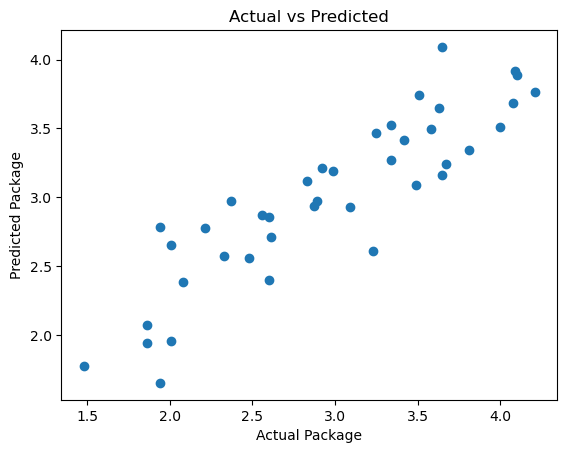

In [71]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Package")
plt.ylabel("Predicted Package")
plt.title("Actual vs Predicted")

plt.show()

## Regression Line Graph (CGPA vs Package)

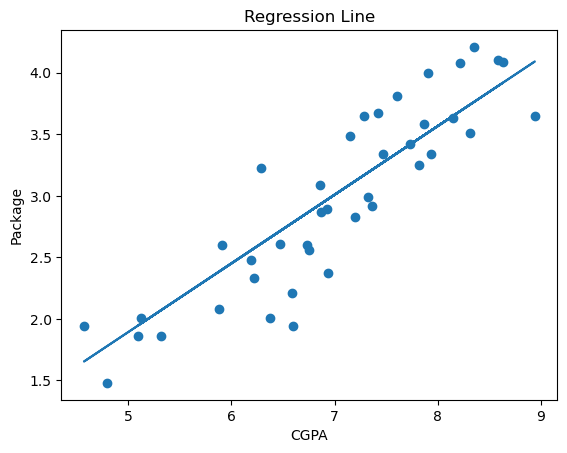

In [74]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)
plt.xlabel("CGPA")
plt.ylabel("Package")
plt.title("Regression Line")
plt.show()

## Residual Plot (Advanced but Powerful)

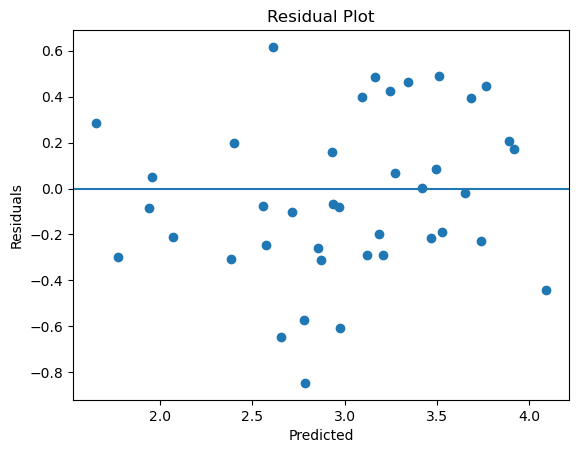

In [73]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()